In [11]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install imblearn
!pip install seaborn
!pip install jinja2
!pip install tqdm
!pip install ipywidgets
!pip install scikit-learn
!pip install seaborn
!pip install imblearn
!pip install graphviz

     -------------------------------------- 133.3/133.3 kB 8.2 MB/s eta 0:00:00
  Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
  Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)


In [14]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [15]:
# Install opendatasets library
!pip install opendatasets

# Read Dataset 

In [16]:
#Setting up kaggle credentials

# TODO: Set your username and token (I let mine to make easier for you to test.)
kaggle_credentials = {"username":"paulohmota","key":"8ca14894f2bba9fd430bf07ce738ad7a"}

#This script will export your crendentials as json next to your notebook in the format that opendatasets required.
import json
with open('kaggle.json', 'w') as fp:
  json.dump(kaggle_credentials, fp)

In [17]:
# Prepare our system to download the datasets from a repository
import os
import opendatasets as od

# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in ".\diabetes-prediction-dataset" (use force=True to force download)


In [18]:
# Display all files in a folder.
data_dir = './diabetes-prediction-dataset'

os.listdir(data_dir)

['diabetes_prediction_dataset.csv']

In [19]:
# Read a csv and load as Pandas Daframe in a variable.
diabetes_data = pd.read_csv(data_dir+"/diabetes_prediction_dataset.csv")

# EDA - Exploratory Data Analysis

In [20]:
# Display the columns and their type.
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
diabetes_data.value_counts()

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
Female  80.00  0             0              No Info          27.32  6.20         90                   0           9
                                                                    6.50         159                  0           9
                                                                    4.00         85                   0           8
                                                                    6.60         155                  0           7
                                                                    4.50         140                  0           7
                                                                                                                 ..
        48.00  0             0              never            27.32  6.60         200                  0           1
                                                                    6.50     

In [22]:
# Overview about the dataset and columns' data.
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [23]:
# display the first 5 records from the dataset
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [24]:
# display the last 5 records from the dataset
diabetes_data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0
99999,Female,57.00,0,0,current,22.43,6.60,90,0


In [25]:
diabetes_data[['age','bmi','hypertension','heart_disease','HbA1c_level','blood_glucose_level','diabetes']].corr() # correlations between data

,age,bmi,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes
age,1.00,0.34,0.25,0.23,0.10,0.11,0.26
bmi,0.34,1.00,0.15,0.06,0.08,0.09,0.21
hypertension,0.25,0.15,1.00,0.12,0.08,0.08,0.20
heart_disease,0.23,0.06,0.12,1.00,0.07,0.07,0.17
HbA1c_level,0.10,0.08,0.08,0.07,1.00,0.17,0.40
blood_glucose_level,0.11,0.09,0.08,0.07,0.17,1.00,0.42
diabetes,0.26,0.21,0.20,0.17,0.40,0.42,1.00


In [26]:
# Displaying by rounding in 3 demicals
cormat = diabetes_data[['age','bmi','hypertension','heart_disease','HbA1c_level','blood_glucose_level','diabetes']].corr() # correlations between data
round(cormat,3)

,age,bmi,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes
age,1.00,0.34,0.25,0.23,0.10,0.11,0.26
bmi,0.34,1.00,0.15,0.06,0.08,0.09,0.21
hypertension,0.25,0.15,1.00,0.12,0.08,0.08,0.20
heart_disease,0.23,0.06,0.12,1.00,0.07,0.07,0.17
HbA1c_level,0.10,0.08,0.08,0.07,1.00,0.17,0.40
blood_glucose_level,0.11,0.09,0.08,0.07,0.17,1.00,0.42
diabetes,0.26,0.21,0.20,0.17,0.40,0.42,1.00


In [27]:
# Loop through each column and count the number of distinct values
for column in diabetes_data.columns:
    num_distinct_values = len(diabetes_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [28]:
# Checking null values
print(diabetes_data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [29]:
diabetes_data.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


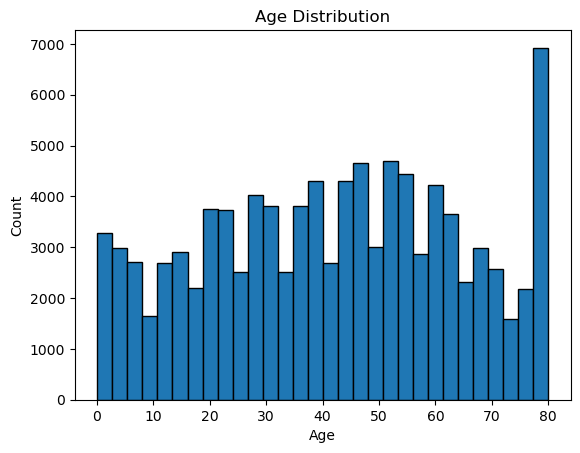

In [30]:
# Histogram for age
plt.hist(diabetes_data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

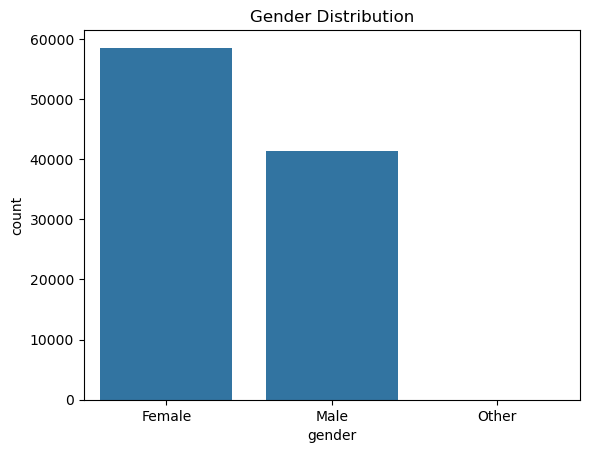

In [31]:
# Bar plot for gender
sns.countplot(x='gender', data=diabetes_data)
plt.title('Gender Distribution')
plt.show()

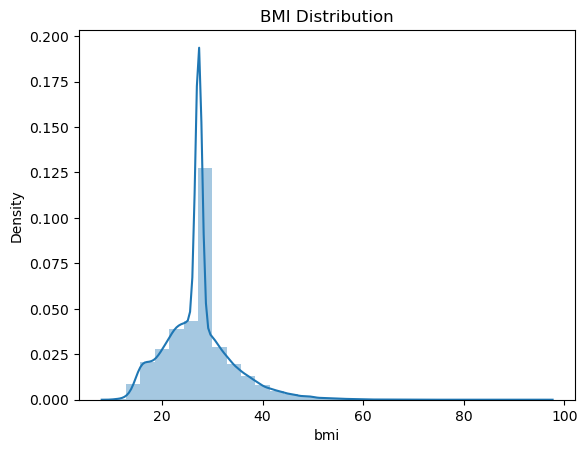

In [32]:
# Distribution plot for BMI
sns.distplot(diabetes_data['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

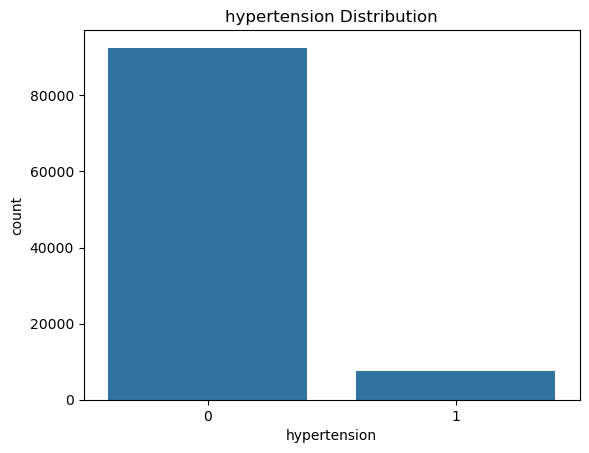

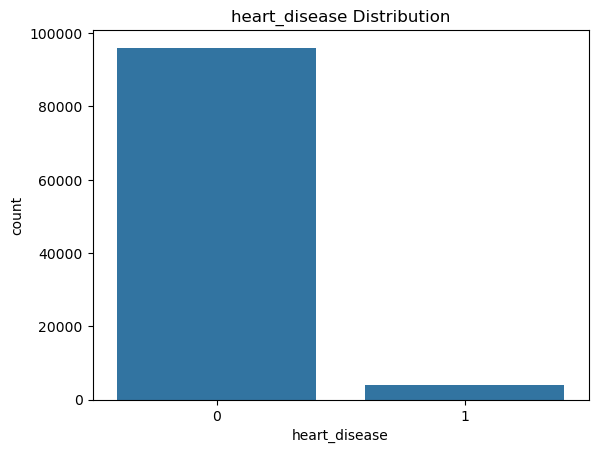

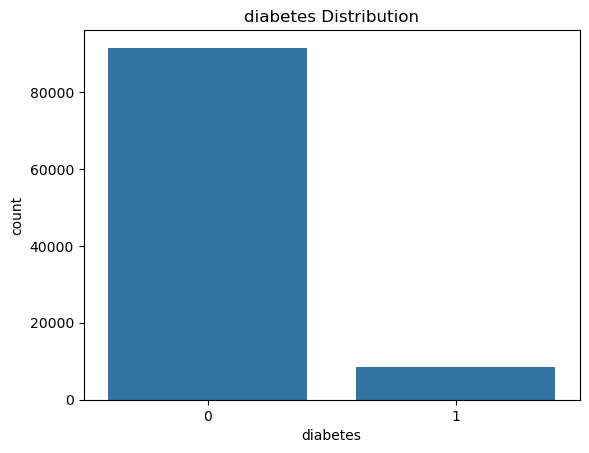

In [33]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=diabetes_data)
    plt.title(f'{col} Distribution')
    plt.show()

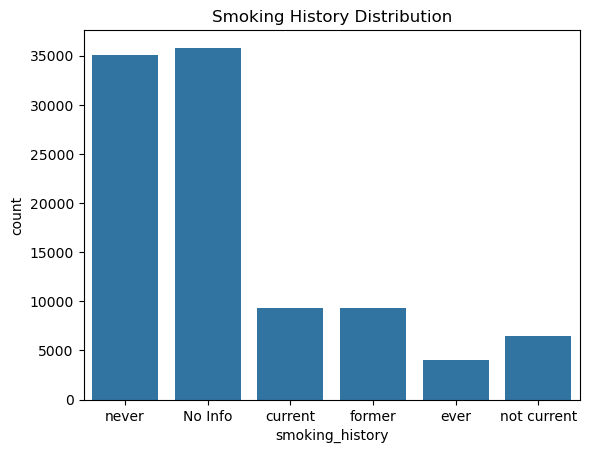

In [34]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=diabetes_data)
plt.title('Smoking History Distribution')
plt.show()

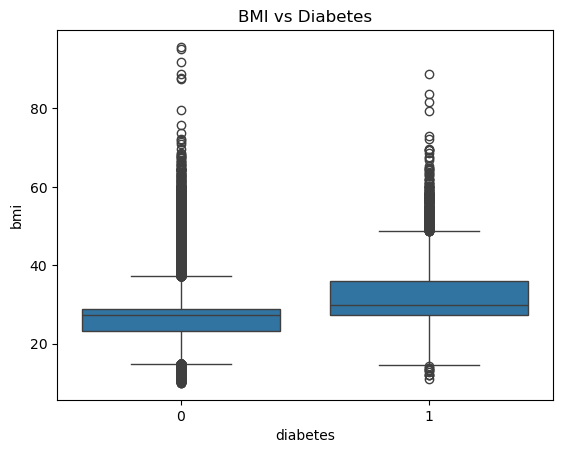

In [35]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=diabetes_data)
plt.title('BMI vs Diabetes')
plt.show()

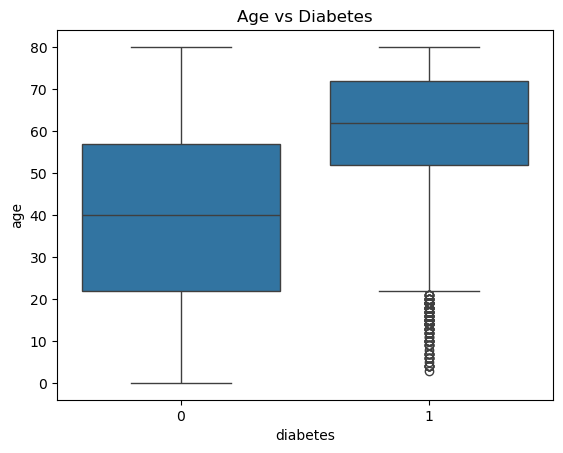

In [36]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=diabetes_data)
plt.title('Age vs Diabetes')
plt.show()

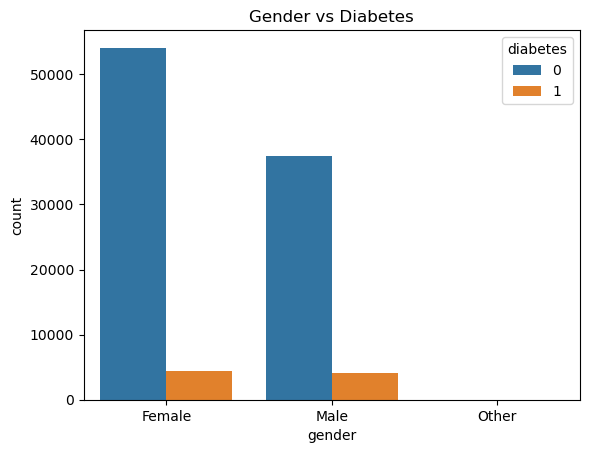

In [37]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=diabetes_data)
plt.title('Gender vs Diabetes')
plt.show()

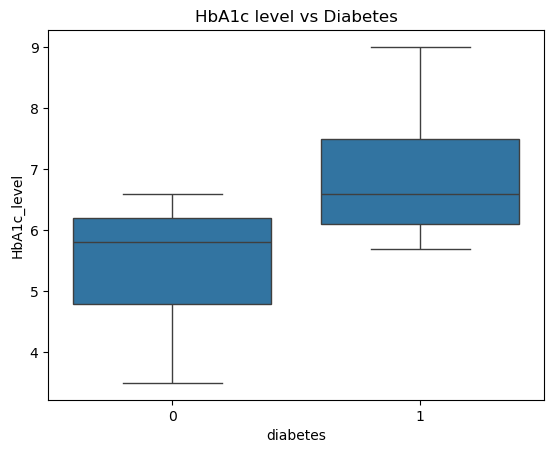

In [38]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes_data)
plt.title('HbA1c level vs Diabetes')
plt.show()

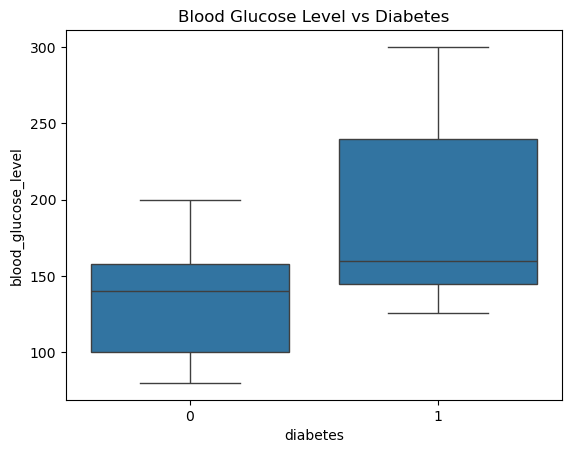

In [39]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes_data)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

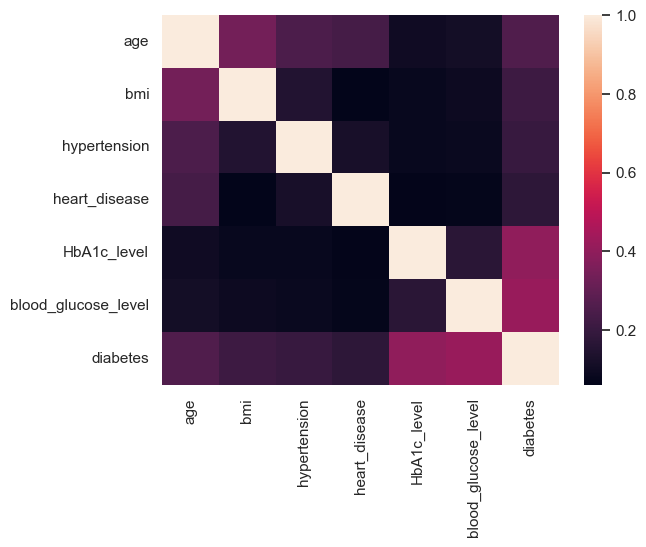

In [40]:
# Displaying the correlation with Seaborn library
sns.set(font_scale=1.0)
sns.heatmap(cormat);

# save the plot as PNG file
plt.savefig("seaborn_plot.png")

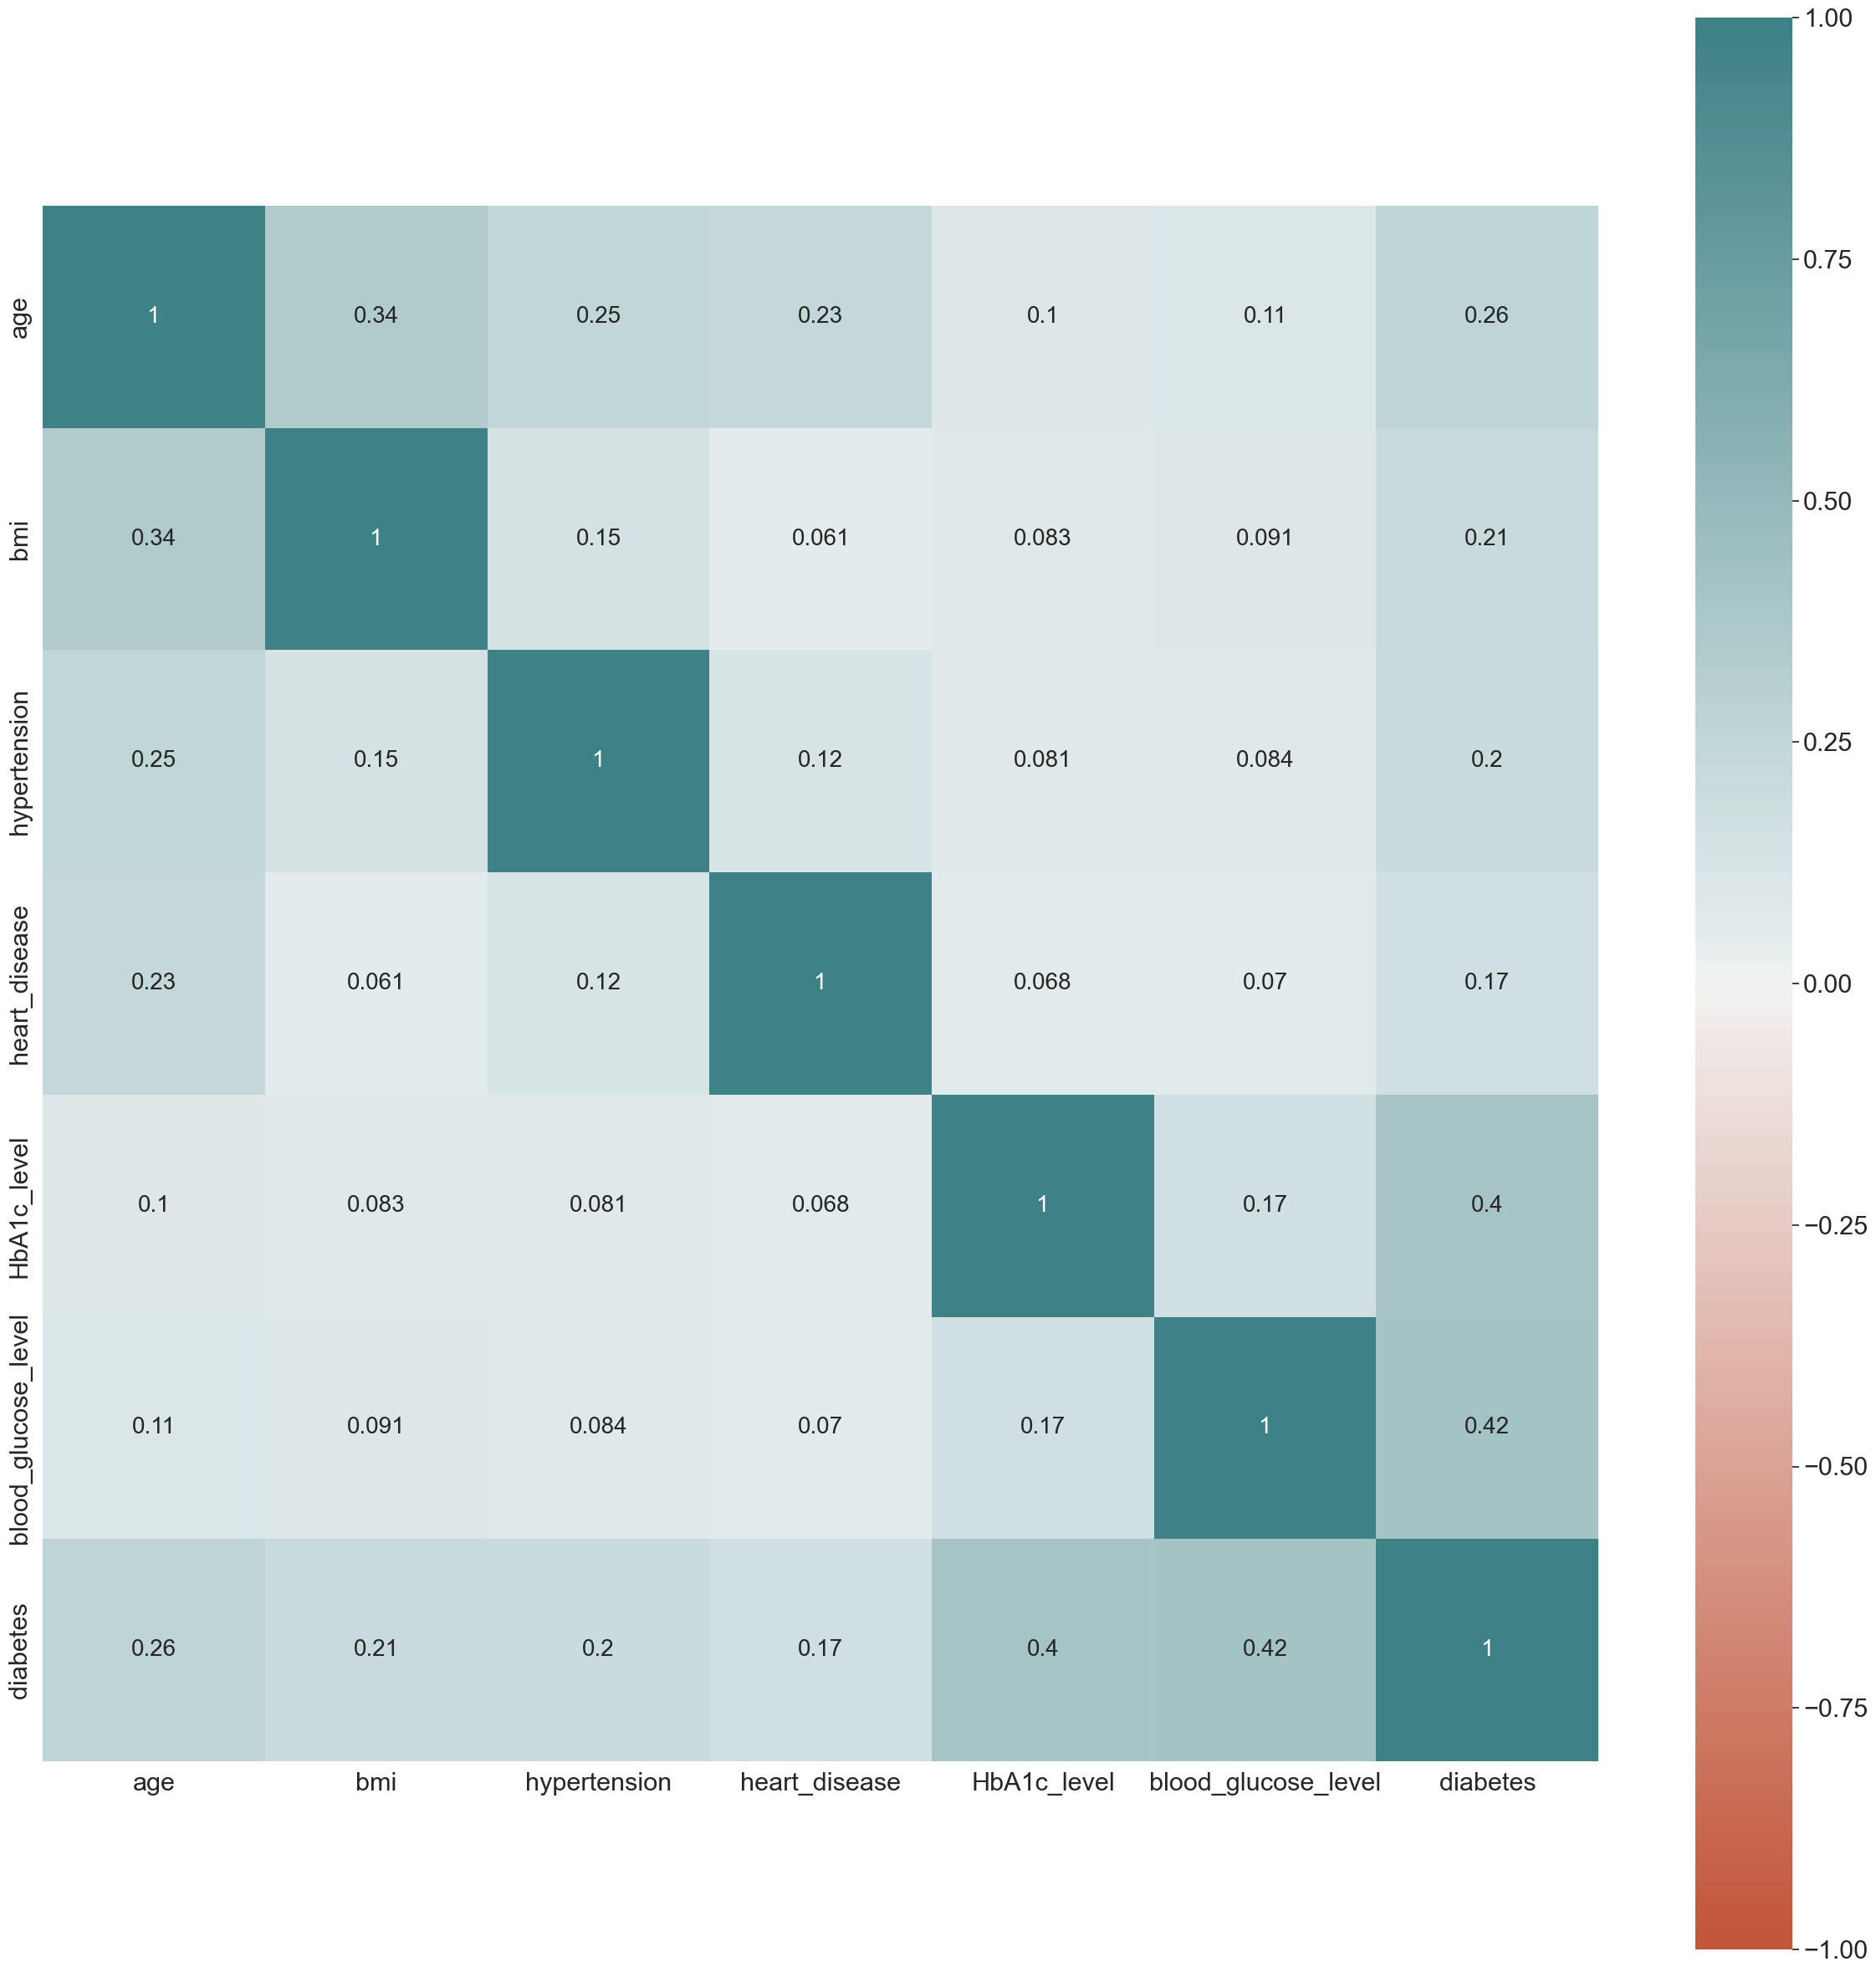

In [41]:
# Plot the correlation heatmap from the dataset.
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})

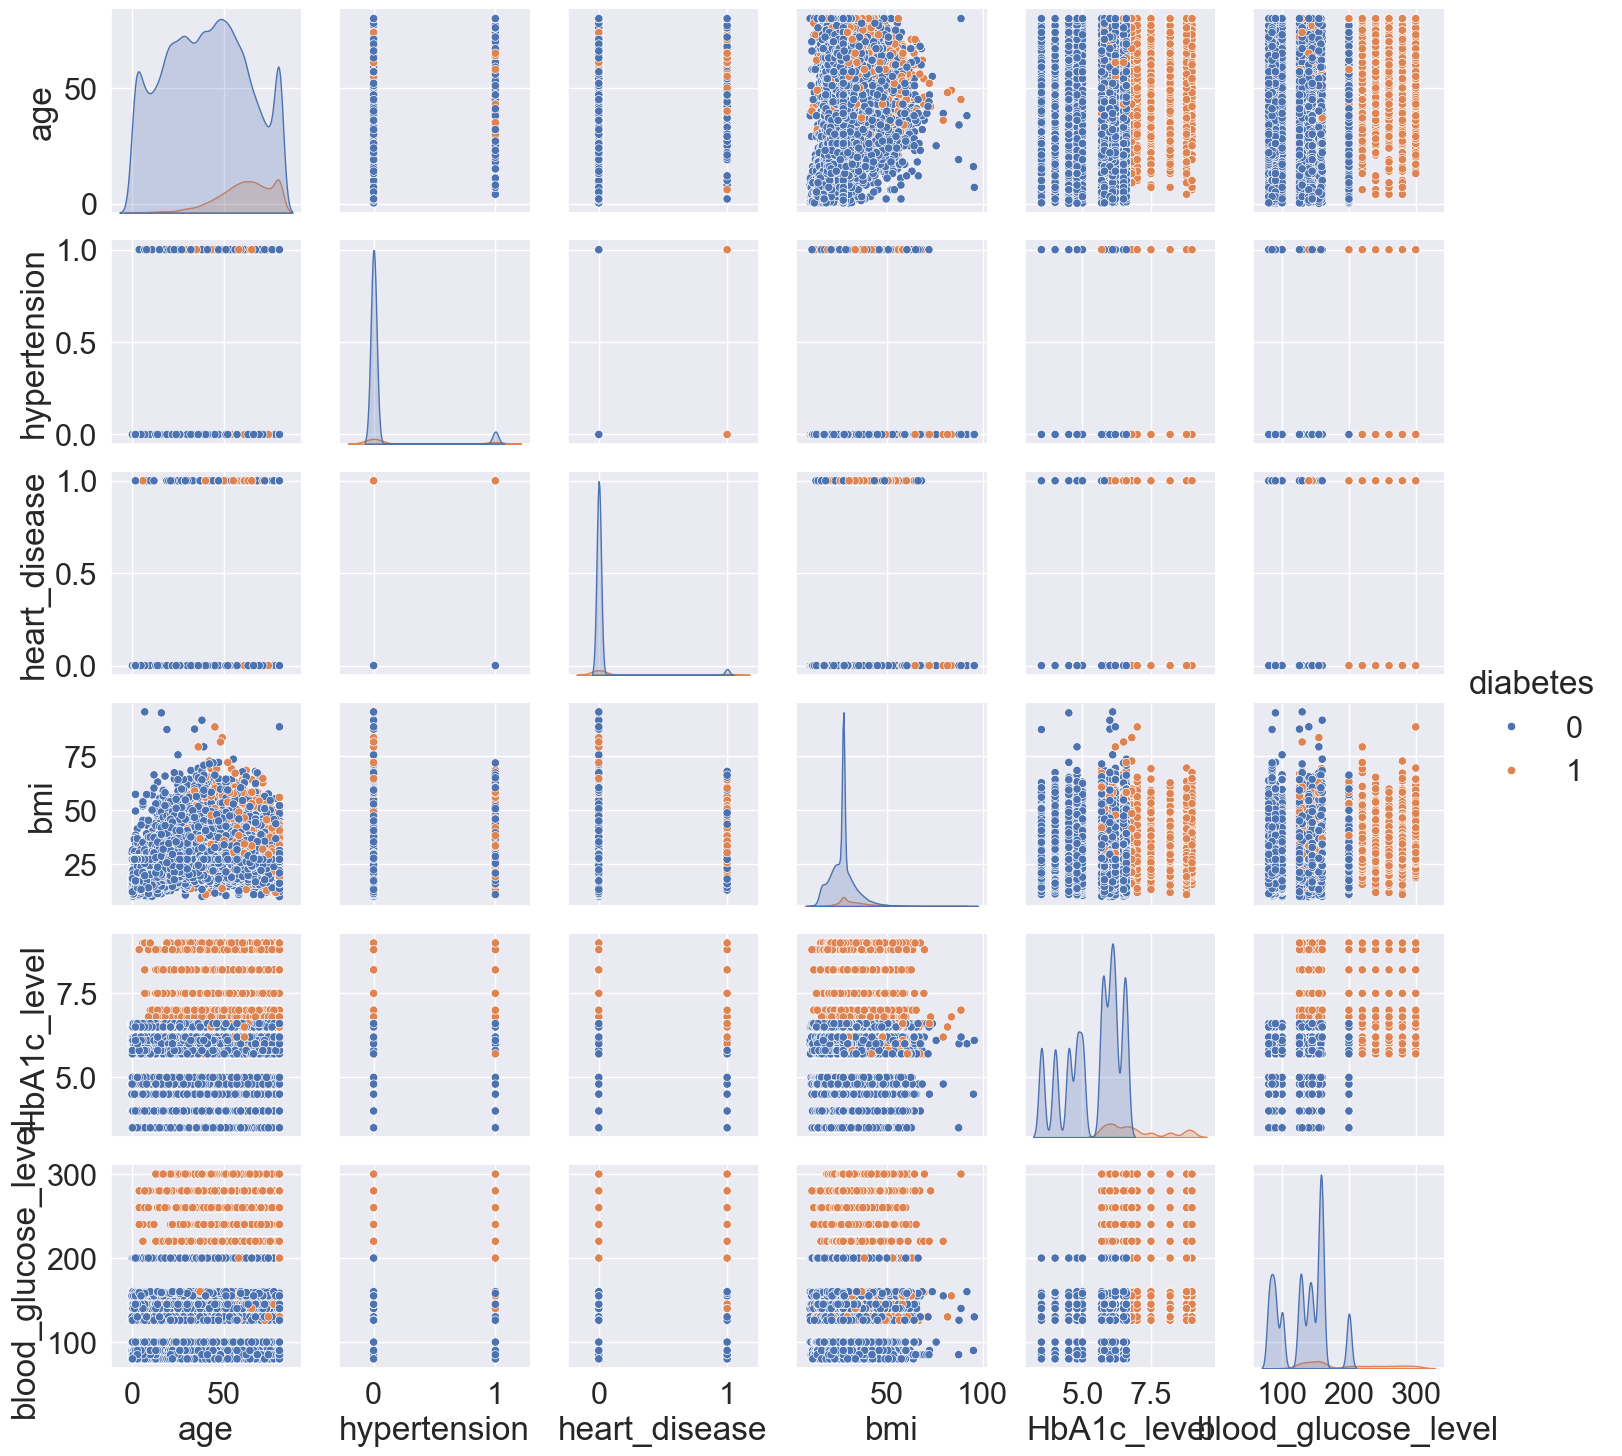

In [42]:
# Pair plot for numeric features
sns.pairplot(diabetes_data, hue='diabetes')
plt.show()

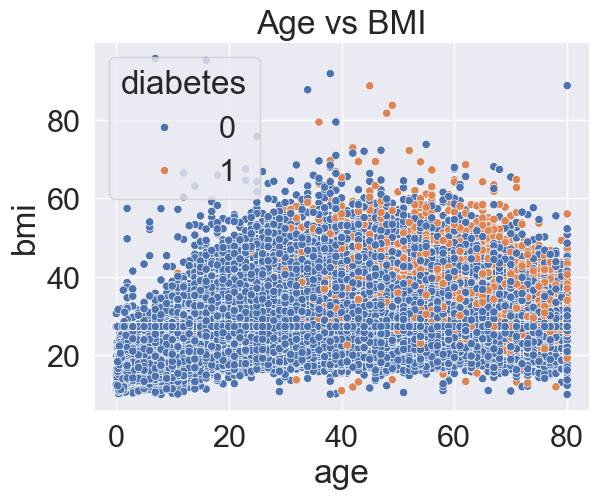

In [43]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=diabetes_data)
plt.title('Age vs BMI')
plt.show()

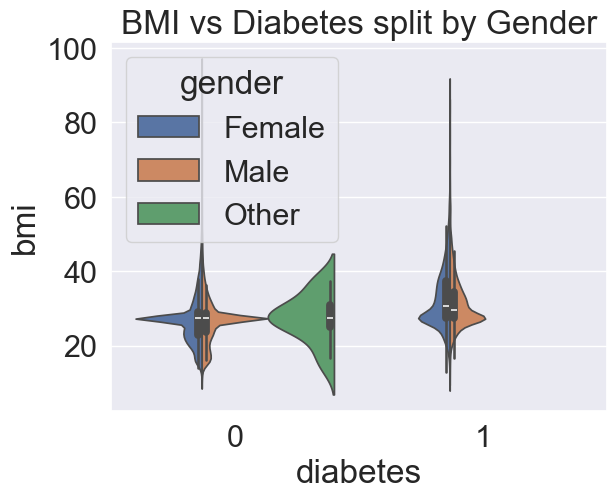

In [44]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=diabetes_data)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

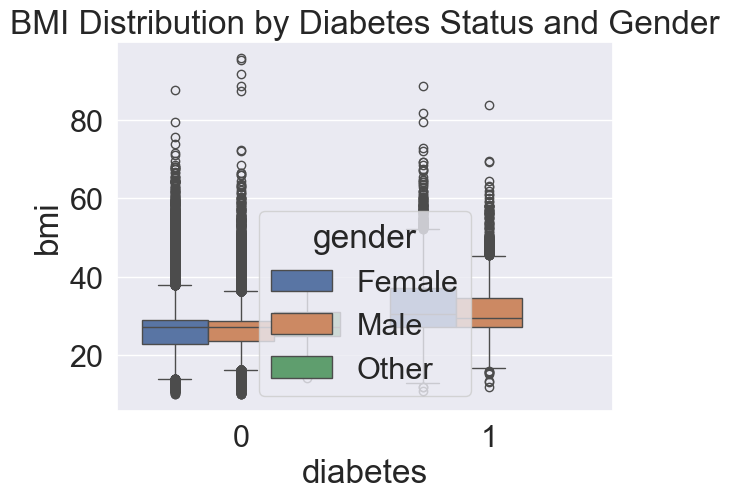

In [45]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=diabetes_data)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

Corr analysis

Weak correlation between the features


Hist

unbalanced dataset

- age (too much samples with 80 years)
- Bmi (too much samples with 28-30 bmi)
- Hypertension (too much samples 0)
- Hearth Desease  (too much samples 0)
- hbA1c_level ( too much sanokes around 5 and lowest samples with value more than 7)
- blood glucose ( too much samples with around 150 and lowest samples with values more than 200)
- Diabetes (too much samples with negative)  

# Pre Processing Data




In [46]:
# reset dataset
# Read a csv and load as Pandas Daframe in a variable.
diabetes_data = pd.read_csv(data_dir+"/diabetes_prediction_dataset.csv")

In [47]:
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Drop Nulls 

In [48]:
diabetes_data = diabetes_data.dropna()

In [49]:
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [50]:
diabetes_data.duplicated().sum()

3854

## Drop Duplicates

In [51]:
diabetes_data = diabetes_data.drop_duplicates()

In [52]:
diabetes_data.duplicated().sum()

0

## Remove `Others` gender

In [53]:
diabetes_data[diabetes_data['gender'] == 'Other'].count()

gender                 18
age                    18
hypertension           18
heart_disease          18
smoking_history        18
bmi                    18
HbA1c_level            18
blood_glucose_level    18
diabetes               18
dtype: int64

In [54]:
diabetes_data = diabetes_data[diabetes_data['gender'] != 'Other']

In [55]:
diabetes_data[diabetes_data['gender'] == 'Other'].count()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Remove `No Info` Smoking history category

In [56]:
diabetes_data[diabetes_data['smoking_history'] == 'no info'].count()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Create dummies from categorical columns

In [57]:
diabetes_data = pd.get_dummies(diabetes_data, columns=["smoking_history"])
diabetes_data = pd.get_dummies(diabetes_data, columns=["gender"])

In [58]:
""" Just to know the label encoder to parse cat into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diabetes_data['smoking_history'] = le.fit_transform(diabetes_data['smoking_history'])
diabetes_data['gender'] = le.fit_transform(diabetes_data['gender'])
"""

" Just to know the label encoder to parse cat into numbers\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndiabetes_data['smoking_history'] = le.fit_transform(diabetes_data['smoking_history'])\ndiabetes_data['gender'] = le.fit_transform(diabetes_data['gender'])\n"

## Overview New Dataset after cleaning

In [59]:
diabetes_data.shape
diabetes_data.columns = diabetes_data.columns.str.lower()

In [60]:
# Displaying by rounding in 3 demicals
cormat = diabetes_data.corr()
round(cormat,3)

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes,smoking_history_no info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_female,gender_male
age,1.00,0.26,0.24,0.34,0.11,0.11,0.27,-0.29,0.03,0.07,0.22,0.07,0.07,0.03,-0.03
hypertension,0.26,1.00,0.12,0.15,0.08,0.09,0.20,-0.11,0.02,0.02,0.08,0.04,-0.00,-0.01,0.01
heart_disease,0.24,0.12,1.00,0.06,0.07,0.07,0.17,-0.05,0.01,0.04,0.09,-0.03,0.01,-0.08,0.08
bmi,0.34,0.15,0.06,1.00,0.08,0.09,0.21,-0.23,0.05,0.04,0.11,0.09,0.04,0.02,-0.02
hba1c_level,0.11,0.08,0.07,0.08,1.00,0.17,0.41,-0.04,0.01,0.01,0.04,0.01,0.01,-0.02,0.02
blood_glucose_level,0.11,0.09,0.07,0.09,0.17,1.00,0.42,-0.05,0.01,0.01,0.04,0.01,0.01,-0.02,0.02
diabetes,0.27,0.20,0.17,0.21,0.41,0.42,1.00,-0.11,0.02,0.02,0.10,0.02,0.02,-0.04,0.04
smoking_history_no info,-0.29,-0.11,-0.05,-0.23,-0.04,-0.05,-0.11,1.00,-0.23,-0.15,-0.24,-0.54,-0.19,-0.06,0.06
smoking_history_current,0.03,0.02,0.01,0.05,0.01,0.01,0.02,-0.23,1.00,-0.07,-0.11,-0.24,-0.09,-0.03,0.03
smoking_history_ever,0.07,0.02,0.04,0.04,0.01,0.01,0.02,-0.15,-0.07,1.00,-0.07,-0.15,-0.06,-0.01,0.01


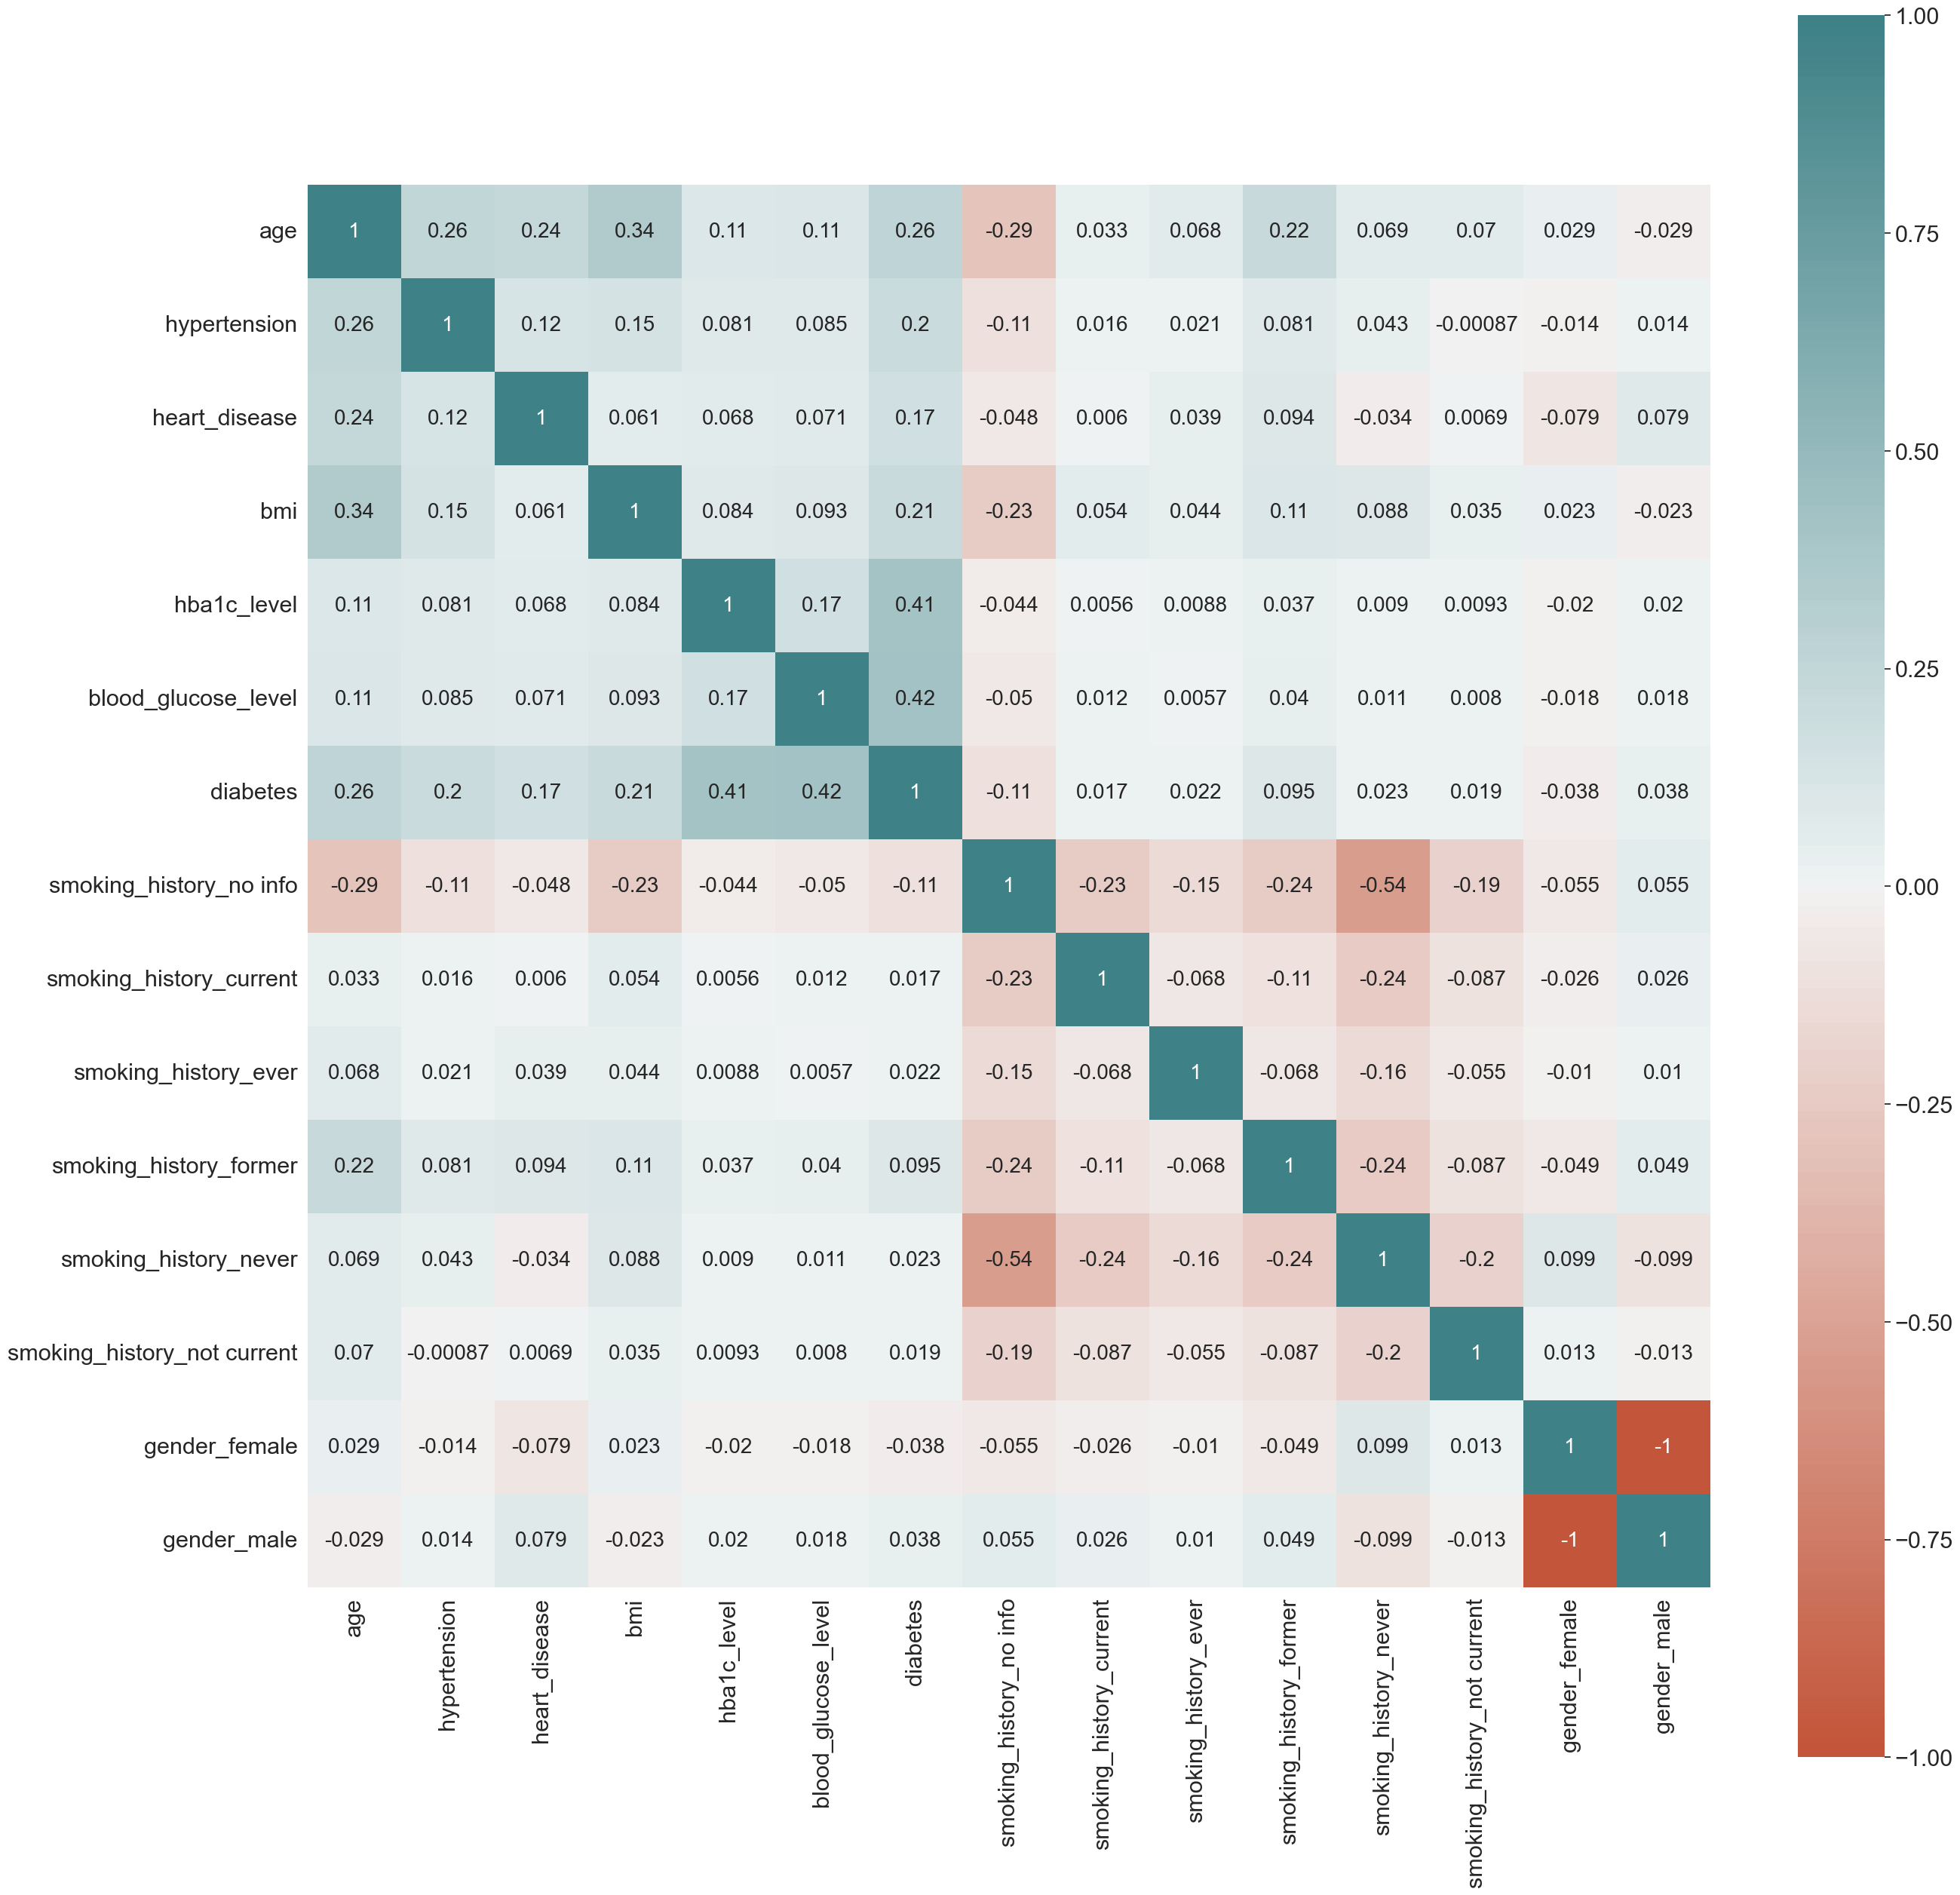

In [61]:
# Plot the correlation heatmap from the dataset.
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})

https://medium.com/@Coursesteach/supervised-learning-with-scikit-learn-part-11-removing-outliers-with-scikit-learn-59d6a2051d02

## Balancing Data with SMOTE

In [62]:
diabetes_data['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

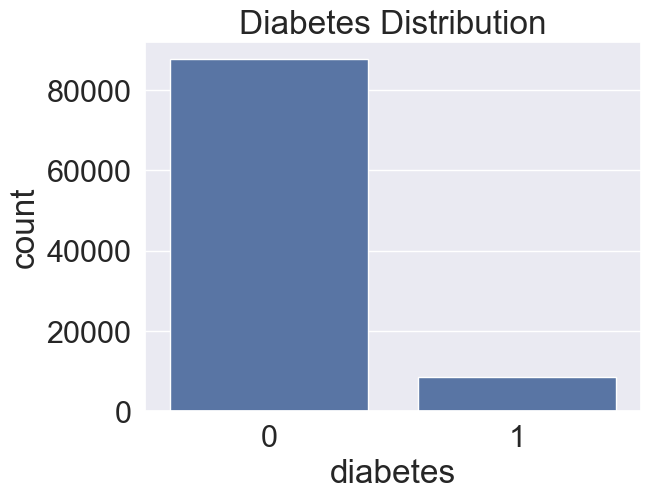

In [63]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=diabetes_data)
plt.title('Diabetes Distribution')
plt.show()

In [64]:
diabetes_data_class_1 = diabetes_data[diabetes_data['diabetes'] == 1]
diabetes_data_class_0 = diabetes_data[diabetes_data['diabetes'] == 0]

In [65]:
diabetes_data_class_1.shape

(8482, 15)

In [66]:
diabetes_data_class_0.shape

(87646, 15)

In [67]:
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    87646
1    87646
Name: diabetes, dtype: int64

In [69]:
X_sm

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,smoking_history_no info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_female,gender_male
0,80.00,0,1,25.19,6.60,140,0,0,0,0,1,0,1,0
1,54.00,0,0,27.32,6.60,80,1,0,0,0,0,0,1,0
2,28.00,0,0,27.32,5.70,158,0,0,0,0,1,0,0,1
3,36.00,0,0,23.45,5.00,155,0,1,0,0,0,0,1,0
4,76.00,1,1,20.14,4.80,155,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175287,80.00,0,0,21.00,6.12,240,0,0,0,0,0,0,1,0
175288,60.00,0,0,27.13,6.63,130,0,0,0,0,0,0,0,1
175289,60.06,0,0,36.30,6.62,126,0,0,0,0,1,0,1,0
175290,58.00,1,0,27.32,7.54,126,0,0,0,0,0,0,1,0


In [70]:
y_sm

0         0
1         0
2         0
3         0
4         0
         ..
175287    1
175288    1
175289    1
175290    1
175291    1
Name: diabetes, Length: 175292, dtype: int64

# Default design charts

In [71]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman', 'font.size': 12})

# Using a predefined style
plt.style.use('ggplot')  # or 'seaborn', 'fivethirtyeight', etc.
"""
# Creating a custom style
custom_style = {
    "axes.spines.bottom": False,
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "xtick.bottom": False,
    "ytick.left": False
}
plt.style.use(custom_style)
"""

'\n# Creating a custom style\ncustom_style = {\n    "axes.spines.bottom": False,\n    "axes.spines.left": False,\n    "axes.spines.right": False,\n    "axes.spines.top": False,\n    "xtick.bottom": False,\n    "ytick.left": False\n}\nplt.style.use(custom_style)\n'

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom color palette
custom_palette = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Define custom colors
colors = [(0.0, "'#1f77b4"),   # Red
          (0.5, "#2ca02c"),   # Yellow
          (1.0, "#ff7f0e")]   # Green

# Set the custom palette as the default palette in Seaborn
sns.set_palette(custom_palette)

# Set font family and size
plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman', 'font.size': 12})

# Set plot style
sns.set_style('darkgrid')  # Corrected to 'darkgrid' for Seaborn

# Modeling

In [73]:
!pip install joblib

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt

# Load and clean your dataset
# Assume X is your features and y is your target variable

# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Balance your dataset (e.g., using oversampling, undersampling, etc.)
# Example:
# (perform balancing here if needed)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define models and their hyperparameters
models = {
    'Gradient Boost': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grids = {
    'Gradient Boost': {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
},
    'Random Forest':  {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
},
    'KNN': {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] },
    
    'Logistic Regression': {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
}

# Perform grid search training
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Export best models
for name, model in best_models.items():
    joblib.dump(model, f"{name}_model.pkl")


exception calling callback for <Future at 0x156de0c9630 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\parallel.py", line 359, in __call__
    *,
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    return outcome['status'] != TASK_ERROR
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    now = time.time()
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    idle_worker_timeout=300, **memmappingexecutor_args):
  File "c:\Users\phmot\.conda\envs\datacade

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\phmot\AppData\Local\Temp\ipykernel_19236\1472837237.py", line 62, in <module>
    grid_search.fit(X_train_scaled, y_train)
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\sklearn\model_selection\_search.py", line 875, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\sklearn\model_selection\_search.py", line 1375, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\sklearn\model_selection\_search.py", line 822, in evaluate_candidates
    out = parallel(
  File "c:\Users\phmot\.conda\envs\datacademy\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    RAM disk filesystem available by default

In [127]:
from sklearn.metrics import classification_report
# Evaluate model performance using classification report
report_dict = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict[name] = report['weighted avg']

# Convert report_dict to DataFrame
report_df = pd.DataFrame.from_dict(report_dict, orient='index')

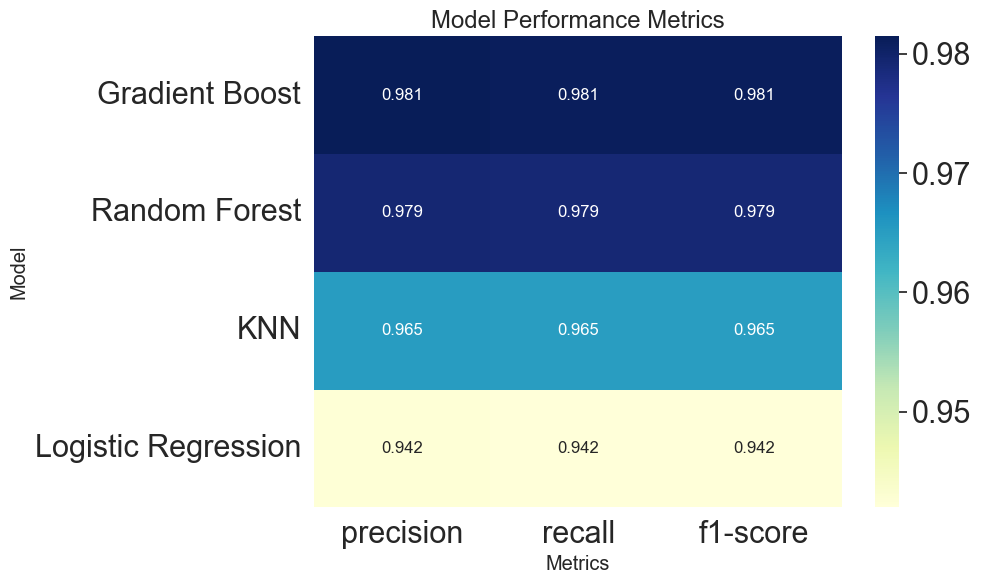

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score','accuracy']], annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


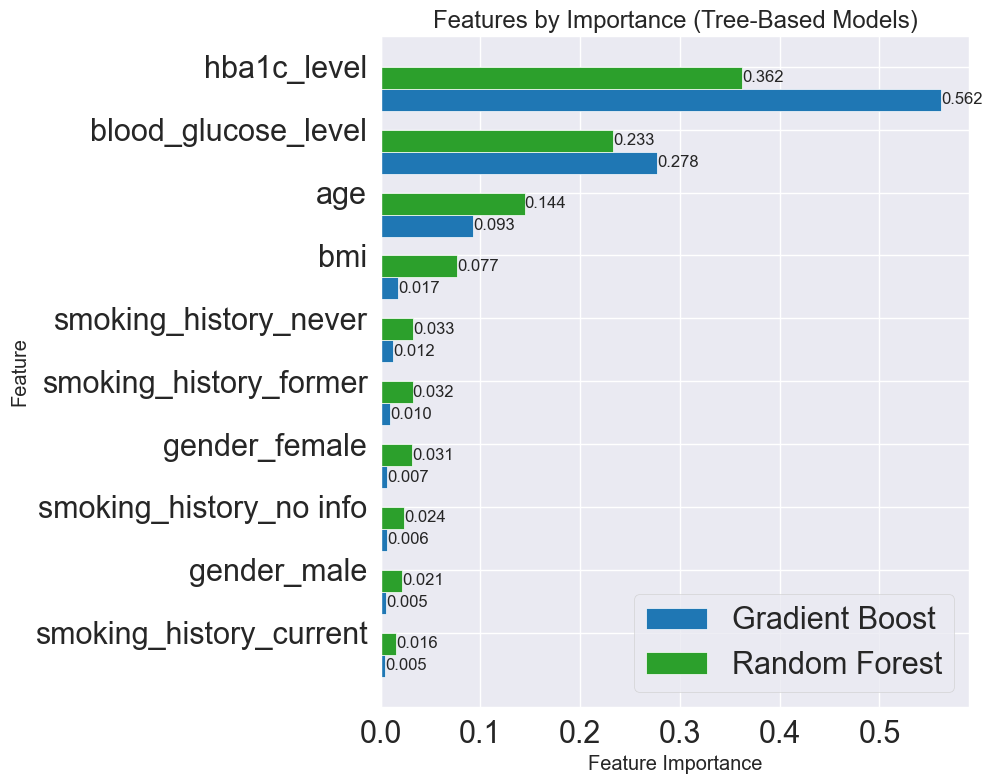

In [129]:
plt.figure(figsize=(10, 8))

bar_height = 0.35  # Height of each bar
num_models = len(best_models)
index = np.arange(10)  # Index for the features

for i, (name, model) in enumerate(best_models.items()):
    if isinstance(model, (GradientBoostingClassifier, RandomForestClassifier)):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        top_features = X.columns[sorted_idx][-10:]  # Selecting top 10 features for visualization
        bars = plt.barh(index + i * bar_height, feature_importance[sorted_idx][-10:], bar_height, label=name)
        for bar, value in zip(bars, feature_importance[sorted_idx][-10:]):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.3f}', va='center')

plt.title('Features by Importance (Tree-Based Models)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.yticks(index + (num_models - 1) * bar_height / 2, top_features)
plt.legend()
plt.tight_layout()
plt.show()


In [130]:
from sklearn.inspection import permutation_importance

plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    if name == 'KNN':
        result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
        sorted_idx = result.importances_mean.argsort()
        plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
        plt.xlabel('Permutation Importance')
        plt.title('Feature Importance - KNN')

plt.show()

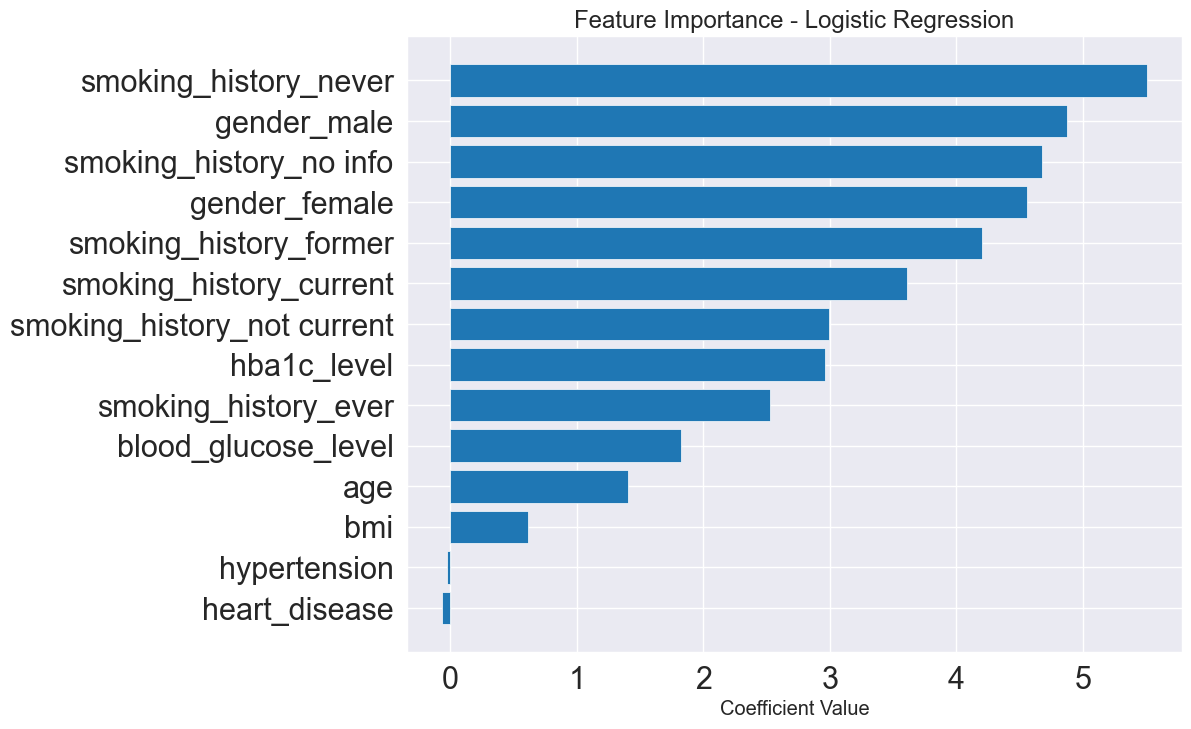

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    if name == 'Logistic Regression':
        coefficients = model.coef_[0]
        sorted_idx = np.argsort(coefficients)
        plt.barh(X.columns[sorted_idx], coefficients[sorted_idx])
        plt.xlabel('Coefficient Value')
        plt.title('Feature Importance - Logistic Regression')

plt.show()

## Random Forest Default Params

# Official Worflow

## Cleaning and Feature Engineering function

In [2]:
def clean_dataset(dataframe):
  "Funtion recieve diabetes dataframe and appply cleaning, feature engineering and balance and return X (features) and y(Tagert)"
  # Drop Nulls
  dataframe = dataframe.dropna()
  print(dataframe.shape)
  # Duplicates
  dataframe = dataframe.drop_duplicates()
  print(dataframe.shape)
  # Drop `Other` gender
  dataframe = dataframe[dataframe['gender'] != 'Other']
  print(dataframe.shape)
 
  # Drop `Other` gender
  dataframe = dataframe[dataframe['smoking_history'] != 'No Info']
  print(dataframe.shape)
  print(dataframe['diabetes'].value_counts())

  dataframe['age'] =  dataframe['age'].astype(int)

  #Categorical
  dataframe = pd.get_dummies(dataframe, columns=["smoking_history"], dtype='int')
  dataframe = pd.get_dummies(dataframe, columns=["gender"], dtype='int')

  print(dataframe.shape)
  
  return  dataframe


def balance_dataset(dataframe):
  from imblearn.over_sampling import SMOTE 

  X = dataframe.drop('diabetes', axis=1)
  y = dataframe['diabetes']

  smote = SMOTE(sampling_strategy='minority')
  X_sm, y_sm = smote.fit_resample(X,y)
  print(X_sm.shape)
  print(y_sm.value_counts())
  return X_sm, y_sm

def drop_outliers(dataframe, field_name):
        iqr = 1.5 * (np.percentile(dataframe[field_name], 75) - np.percentile(dataframe[field_name], 25))
        dataframe.drop(dataframe[dataframe[field_name] > (iqr + np.percentile(dataframe[field_name], 75))].index, inplace=True)
        dataframe.drop(dataframe[dataframe[field_name] < (np.percentile(dataframe[field_name], 25) - iqr)].index, inplace=True)


def pre_processing_data():
    #read data
    diabetes_data = pd.read_csv(data_dir+"/diabetes_prediction_dataset.csv")
    #clean data
    df_after_clean = clean_dataset(diabetes_data) 
    # remove outliers
    selected_columns = ['bmi','age','HbA1c_level','blood_glucose_level']
    for column in selected_columns:
        drop_outliers(df_after_clean, column)
    print(df_after_clean['diabetes'].value_counts())
    # balance data
    X, y = balance_dataset(df_after_clean)
    return X, y

## Results Cleaning and Feature engineering 

In [95]:
# reset dataset
# Read a csv and load as Pandas Daframe in a variable.
diabetes_data = pd.read_csv(data_dir+"/diabetes_prediction_dataset.csv")

df_after_clean = clean_dataset(diabetes_data) 

selected_columns = ['bmi','age','HbA1c_level','blood_glucose_level']
for column in selected_columns:
    drop_outliers(df_after_clean, column)
print(df_after_clean.shape)
print(df_after_clean['diabetes'].value_counts())
X, y = balance_dataset(df_after_clean)


(100000, 9)
(96146, 9)
(96128, 9)
(63247, 9)
diabetes
0    56210
1     7037
Name: count, dtype: int64
(63247, 14)
(57915, 14)
diabetes
0    53942
1     3973
Name: count, dtype: int64
(107884, 13)
diabetes
0    53942
1    53942
Name: count, dtype: int64


In [96]:
df_after_clean.shape

(57915, 14)

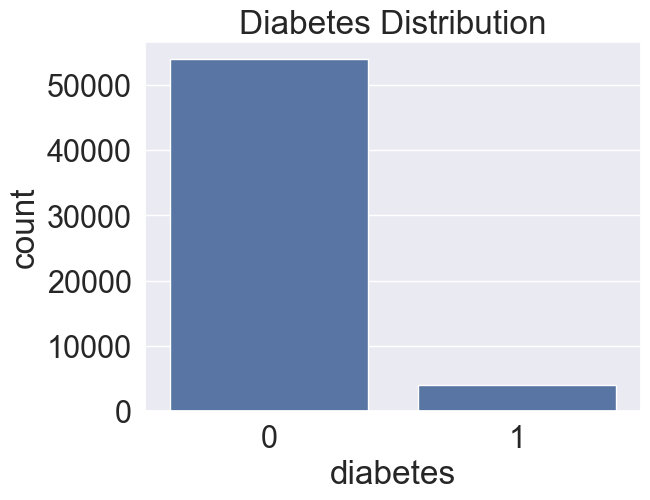

In [97]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df_after_clean)
plt.title('Diabetes Distribution')
plt.show()

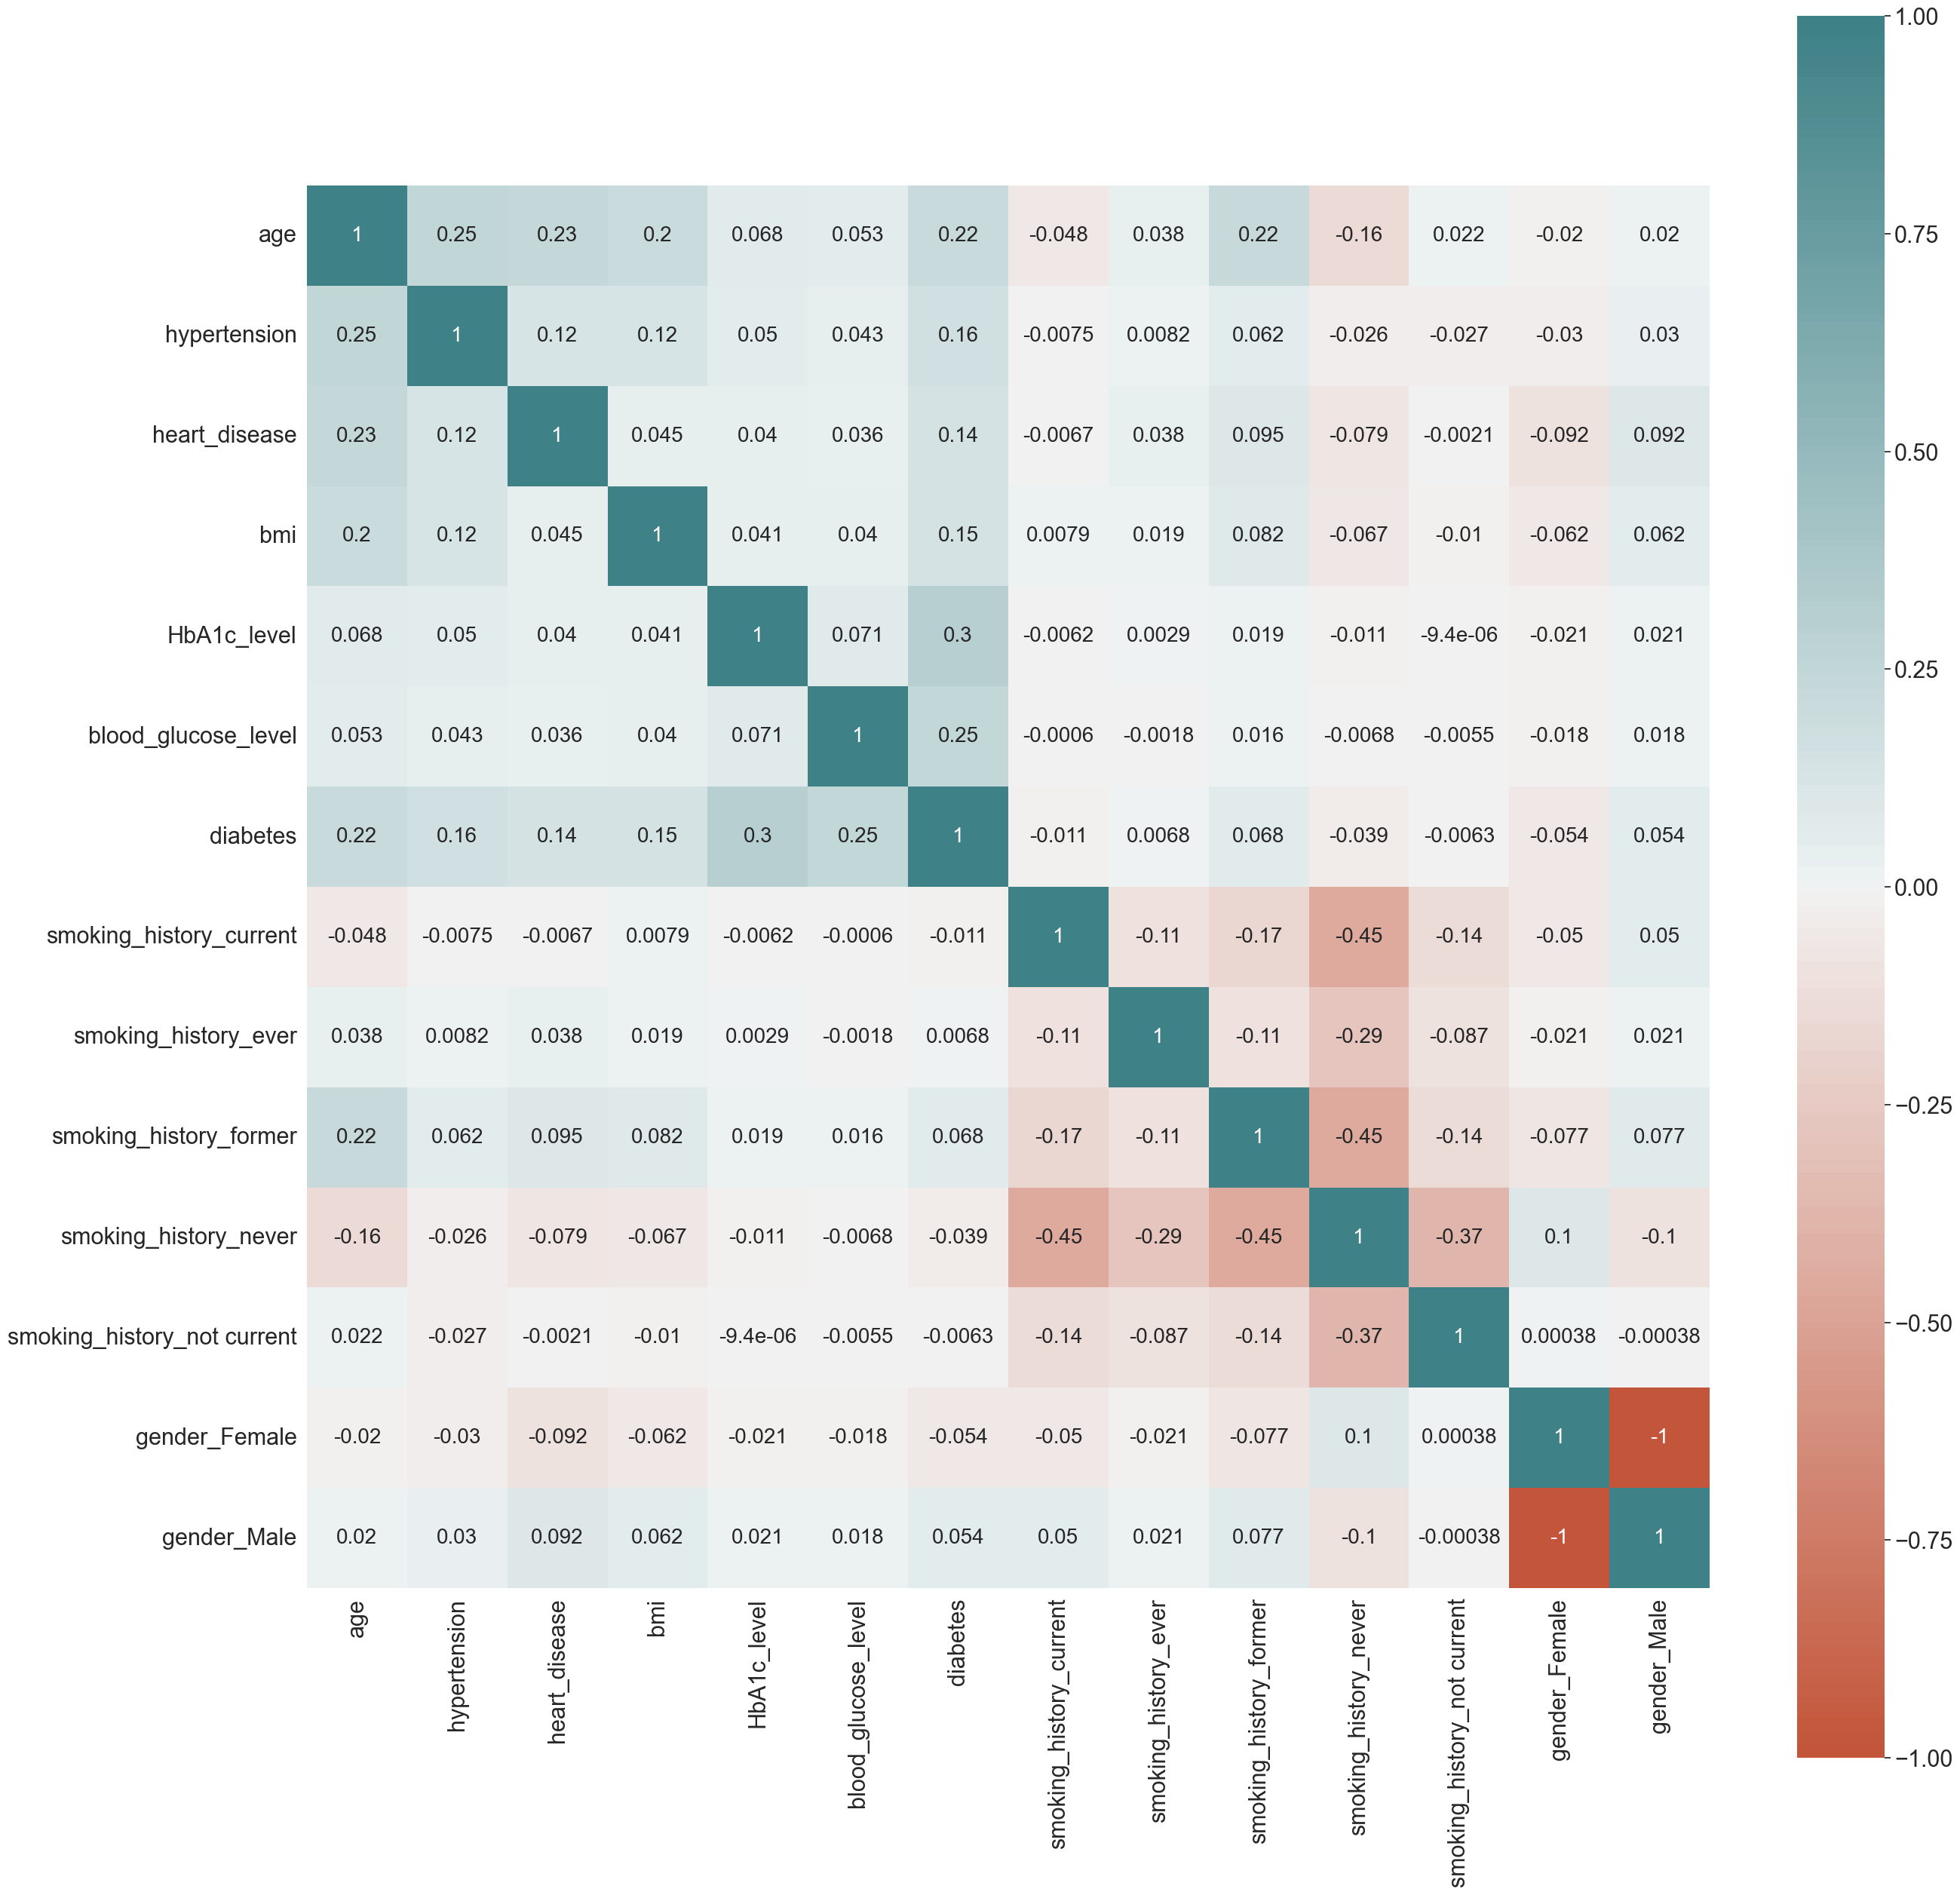

In [98]:
# Plot the correlation heatmap from the dataset.
# Displaying by rounding in 3 demicals
cormat = df_after_clean.corr()
round(cormat,3)
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})

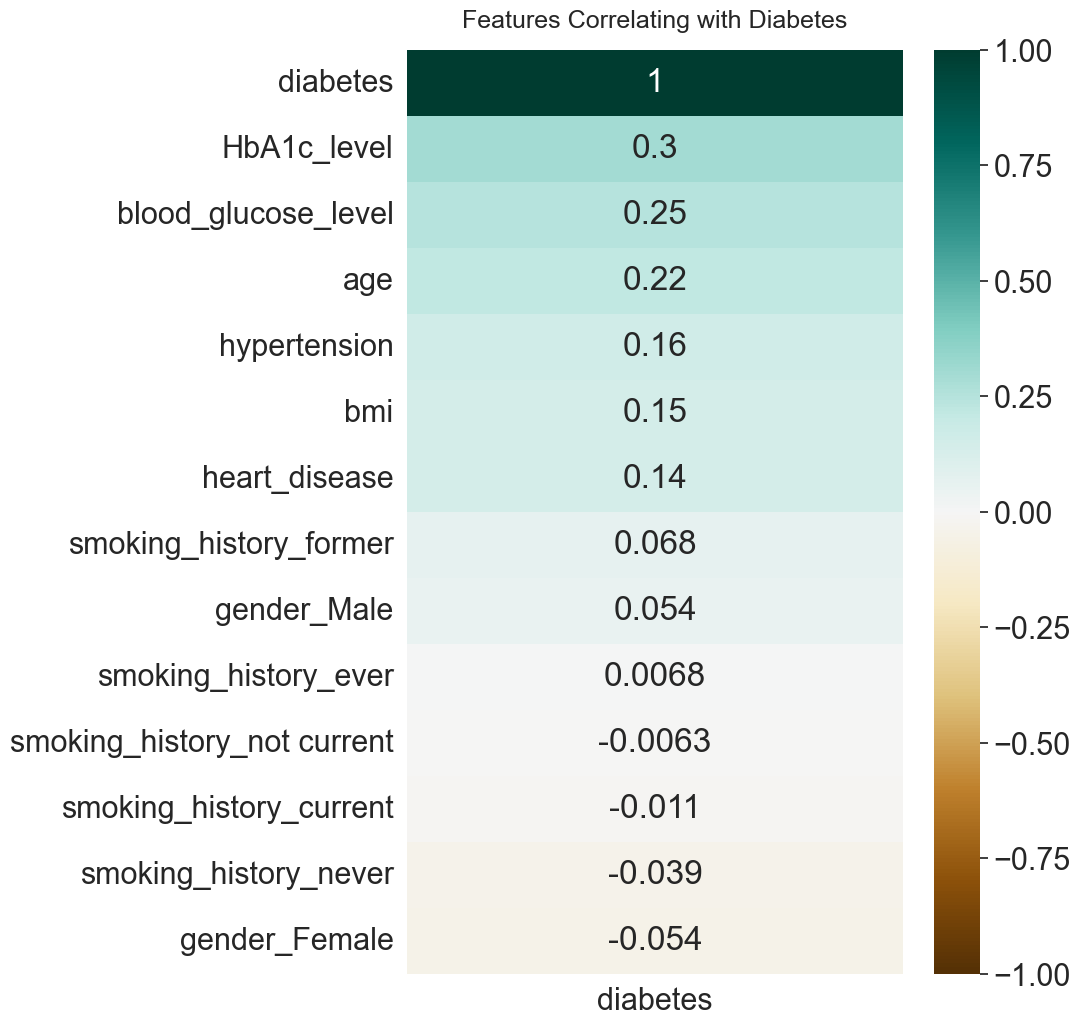

In [99]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_after_clean.corr()[['diabetes']].sort_values(by='diabetes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Diabetes', fontdict={'fontsize':18}, pad=16);

In [100]:
df_after_clean.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current', 'gender_Female',
       'gender_Male'],
      dtype='object')

TypeError: drop_outliers() missing 1 required positional argument: 'field_name'

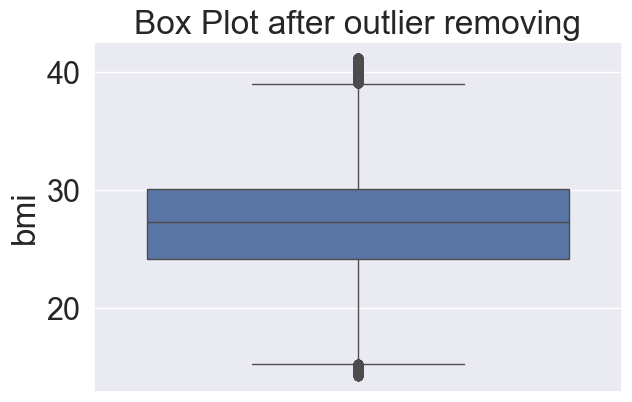

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

selected_columns = ['bmi','age','HbA1c_level','blood_glucose_level']
for column in selected_columns:
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.boxplot(df_after_clean[column])
    plt.title("Box Plot before outlier removing")
    drop_outliers(column)
    plt.subplot(2,2,2)
    sns.boxplot(df_after_clean[column], color='green')
    plt.title("Box Plot after outlier removing")
    plt.show()

##  Balancing SMOTE

In [ ]:
X, y = balance_dataset(df_after_clean)

(107884, 13)
diabetes
0    53942
1    53942
Name: count, dtype: int64


In [102]:
X, y = pre_processing_data()

(100000, 9)
(96146, 9)
(96128, 9)
(63247, 9)
diabetes
0    56210
1     7037
Name: count, dtype: int64
(63247, 14)
diabetes
0    53942
1     3973
Name: count, dtype: int64
(107884, 13)
diabetes
0    53942
1    53942
Name: count, dtype: int64


## Split Train and Test

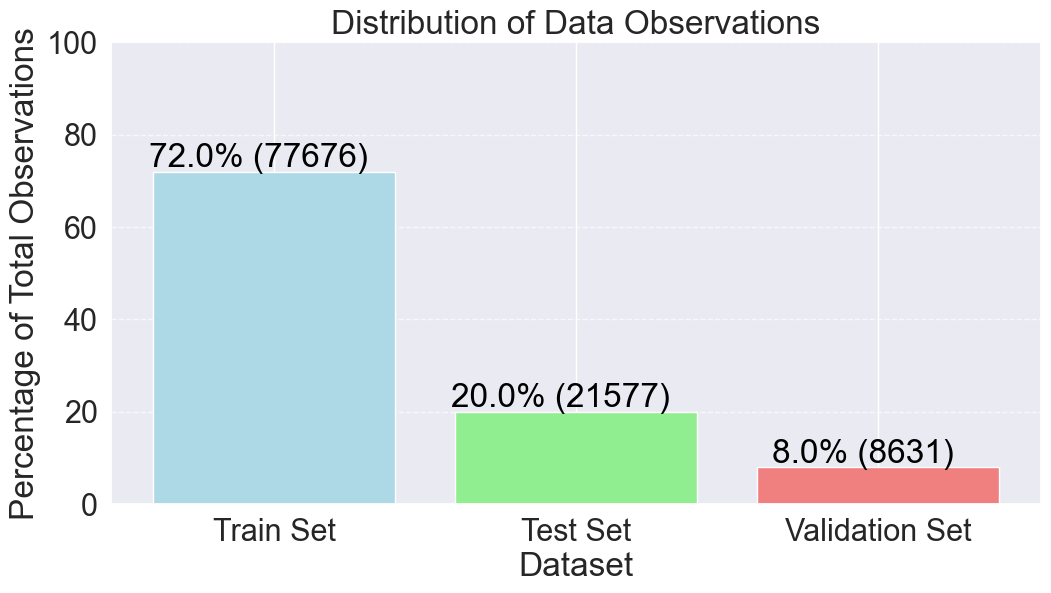

In [103]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Further split the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

# Calculate the number of observations in each set
total_obs = len(X)
train_obs = len(X_train)
test_obs = len(X_test)
valid_obs = len(X_valid)

# Calculate percentages
train_percent = (train_obs / total_obs) * 100
test_percent = (test_obs / total_obs) * 100
valid_percent = (valid_obs / total_obs) * 100

# Plotting
labels = ['Train Set', 'Test Set', 'Validation Set']
percentages = [train_percent, test_percent, valid_percent]
observations = [train_obs, test_obs, valid_obs]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, percentages, color=['lightblue', 'lightgreen', 'lightcoral'])

# Adding percentages on top of the bars
for bar, percent, obs in zip(bars, percentages, observations):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 1, f'{percent:.1f}% ({obs})', ha='center', color='black')

plt.xlabel('Dataset')
plt.ylabel('Percentage of Total Observations')
plt.title('Distribution of Data Observations')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()